In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split

from IPython.core.display import display, HTML

df = pd.read_csv("ML_Processed_Data.csv")
display(HTML(df.head().to_html()))

/Users/chaitanyapotnis/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Unnamed: 0,Year,Respondent_ID,Agency_Code,Loan_Type,Property_Type,Loan_Purpose,Occupancy,Amount,Action_Type,State_Code,County_Code,Income,Purchaser_Type,Denial_Reason_1,Rate_Spread,Application_Date_Indicator,Property_Location,USPS_Code,GDP,Real State Growth %,Rate,PMT,IncRat,Unemployemnt,AmorTerm,BoCreditScor,LTV
0,0,2015,659855,2,1,1,1,2,113,1,2,20,61,7,,NA,0,Alaska,AK,53.4,0.6,3.850577,529.790534,0.104221,6.5,360,4,0.75
1,1,2015,2888798,2,1,1,1,1,351,1,2,20,125,3,,NA,0,Alaska,AK,53.4,0.6,3.850577,1645.632542,0.157981,6.5,360,4,0.75
2,2,2015,2888798,2,1,1,1,1,148,2,2,20,69,0,,NA,0,Alaska,AK,53.4,0.6,3.850577,693.884947,0.120676,6.5,360,4,0.75
3,3,2015,2888798,2,1,1,1,1,167,2,2,20,69,0,,NA,0,Alaska,AK,53.4,0.6,3.850577,782.964771,0.136168,6.5,360,4,0.75
4,4,2015,2888798,2,1,1,1,1,197,1,2,20,43,6,,NA,0,Alaska,AK,53.4,0.6,3.850577,923.617125,0.257754,6.5,360,4,0.75


In [2]:
interested = ['Agency_Code', 'Loan_Type','Property_Type', 'Loan_Purpose', 'Occupancy', 'Amount', 'Action_Type','State_Code', 'County_Code', 'Income', 'Purchaser_Type ','Application_Date_Indicator','Property_Location', 'USPS_Code', 'GDP', 'Real State Growth %', 'Rate','PMT', 'IncRat', 'Unemployemnt', 'AmorTerm', 'BoCreditScor', 'LTV']
data = df[interested]

cat = ['Agency_Code', 'Loan_Type', 'Property_Type', 'Loan_Purpose','Occupancy','USPS_Code' , 'County_Code','BoCreditScor', 'LTV' ]

no_cat = ['Amount', 'Income', 'GDP', 'Real State Growth %', 'Rate', 'PMT', 'IncRat', 'Unemployemnt']

pre = pd.get_dummies(data, columns=cat, drop_first=True)

scaler = MinMaxScaler()
scale = pd.DataFrame(data = pre)
scale[no_cat] = scaler.fit_transform(pre[no_cat])

s1 = scale[scale["Action_Type"] == 1]
s2 = scale[scale["Action_Type"] == 2]
s6 = scale[scale["Action_Type"] == 6]
s3 = scale[scale["Action_Type"] == 3]
s7 = scale[scale["Action_Type"] == 7]

a = s1.head(6000)
a= a.append(s2.head(500))
a= a.append(s6.head(500))

d = s3.head(6997)
d = d.append(s7.head(3))

final = a.append(d)

#Shuffling the dataframe
df = final.sample(frac=1).reset_index(drop=True)

y = []
a = 0
d = 0
for i in final["Action_Type"]:
    if i ==1 or i ==2 or i ==6:
        a +=1
        y.append(1)
        
    elif i ==3 or i==7:
        d +=1
        y.append(0)

In [3]:
del final["Action_Type"]
del final['Property_Location']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(final, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)


print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 9800 samples.
Testing set has 4200 samples.


In [5]:
X_train
Xtrain = X_train.reset_index(drop=True)

In [6]:
Xtrain = np.array(X_train)
ytrain = np.array(y_train)
Xtest = np.array(X_test)
ytest = np.array(y_test)


In [13]:
classifier = 0
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units = 6, activation = 'relu', input_dim = 339))

classifier.add(Dense(units = 6, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(Xtrain, ytrain, batch_size =32, epochs = 20, validation_split= 0.30)

Train on 6860 samples, validate on 2940 samples
Epoch 1/20
6860/6860 [==============================] - 1s - loss: 0.4933 - acc: 0.7532 - val_loss: 0.4068 - val_acc: 0.7952
Epoch 2/20
6860/6860 [==============================] - 1s - loss: 0.3299 - acc: 0.8662 - val_loss: 0.2642 - val_acc: 0.9156
Epoch 3/20
6860/6860 [==============================] - 1s - loss: 0.2107 - acc: 0.9389 - val_loss: 0.1758 - val_acc: 0.9582
Epoch 4/20
6860/6860 [==============================] - 1s - loss: 0.1464 - acc: 0.9612 - val_loss: 0.1317 - val_acc: 0.9636
Epoch 5/20
6860/6860 [==============================] - 1s - loss: 0.1145 - acc: 0.9676 - val_loss: 0.1114 - val_acc: 0.9653
Epoch 6/20
6860/6860 [==============================] - 1s - loss: 0.0995 - acc: 0.9706 - val_loss: 0.1253 - val_acc: 0.9503
Epoch 7/20
6860/6860 [==============================] - 1s - loss: 0.0903 - acc: 0.9716 - val_loss: 0.1202 - val_acc: 0.9514
Epoch 8/20
6860/6860 [==============================] - 1s - loss: 0.0886 - a

In [15]:
# Predicting the Test set results
score = classifier.evaluate(Xtest, ytest, batch_size=32)



4160/4200 [============================>.] - ETA: 0s

In [16]:
score

[0.08232805326581001, 0.9621428571428572]

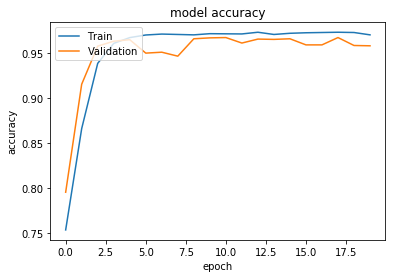

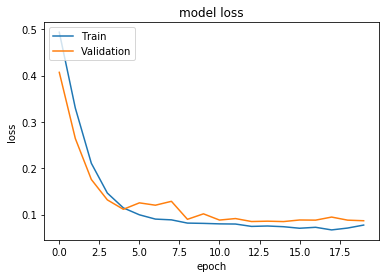

In [18]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()